___

In [1]:
# Import libraries to be used

# Warning messages display
# import warnings
# warnings.filterwarnings(action='once') # https://docs.python.org/3/library/warnings.html#the-warnings-filter

# Directories/Files management
import os.path
## from zipfile import ZipFile # De momento no ha hecho falta 

# Timing
import time

# Data analysis and wrangling
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) # Show all columns in DataFrames
pd.set_option('display.max_rows', 100) # If too high, it greatly slows down the output display and freezes the kernel


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot') # choose a style: 'plt.style.available'
sns.set_theme(context='notebook',
              style="darkgrid") # {darkgrid, whitegrid, dark, white, ticks}
palette = sns.color_palette("flare", as_cmap=True);
import altair as alt

# Machine Learning
## from sklearn.[...] import ...

In [2]:
%load_ext memory_profiler

In [3]:
t0 = time.perf_counter() 

In [4]:
# Detect Operating System running and manage paths accordingly

if os.name == 'nt': # Windows
    root = r"C:\Users\turge\CompartidoVM\0.TFM"
    print("Running on Windows.")
elif os.name == 'posix': # Ubuntu
    root = "/home/dsc/shared/0.TFM"
    print("Running on Ubuntu.")
print("root path\t", root)

Running on Windows.
root path	 C:\Users\turge\CompartidoVM\0.TFM


# Load the dataset

In [5]:
cols = [
    'MONTH',
#     'DAY_OF_MONTH',
    'DAY_OF_WEEK',
    'OP_UNIQUE_CARRIER',
#     'TAIL_NUM',
    'ORIGIN',
#     'ORIGIN_CITY_NAME',
#     'ORIGIN_STATE_ABR',
#     'ORIGIN_STATE_NM',
#     'WBAN_Origin_OTP',
    'DEST',
#     'DEST_CITY_NAME',
#     'DEST_STATE_ABR',
#     'DEST_STATE_NM',
#     'WBAN_Dest_OTP',
#     'CRS_DEP_TIME',
#     'DEP_TIME',
#     'DEP_DELAY',
#     'DEP_DEL15',
    'DEP_TIME_hour',
#     'TAXI_OUT',
#     'TAXI_IN',
    'TAXI_OUT_median',
    'TAXI_IN_median',
#     'CRS_ARR_TIME',
#     'ARR_TIME',
#     'ARR_DELAY',
    'ARR_DEL15', # → Target !!
    'ARR_TIME_hour',
#     'CANCELLED',
#     'CRS_ELAPSED_TIME',
#     'DISTANCE',
    'DISTANCE_GROUP',
#     'CARRIER_DELAY',
#     'WEATHER_DELAY',
#     'NAS_DELAY',
#     'SECURITY_DELAY',
#     'LATE_AIRCRAFT_DELAY',
    
#     'STATION_Origin',
#     'WMO_Origin',
#     'WBAN_Origin_LCD',
#     'LATITUDE_Origin',
#     'LONGITUDE_Origin',
    'HourlyAltimeterSetting_Origin',
    'HourlyDryBulbTemperature_Origin',
    'HourlyPrecipitation_Origin',
    'HourlyRelativeHumidity_Origin',
    'HourlySkyConditions_Origin',
    'HourlyVisibility_Origin',
#     'HourlyWindDirection_Origin',
    'HourlyWindGustSpeed_Origin',
    'HourlyWindSpeed_Origin',
#     'REM_Origin',
#     'STATION_Dest',
#     'WMO_Dest',
#     'WBAN_Dest_LCD',
#     'LATITUDE_Dest',
#     'LONGITUDE_Dest',
    'HourlyAltimeterSetting_Dest',
    'HourlyDryBulbTemperature_Dest',
    'HourlyPrecipitation_Dest',
    'HourlyRelativeHumidity_Dest',
    'HourlySkyConditions_Dest',
    'HourlyVisibility_Dest',
#     'HourlyWindDirection_Dest',
    'HourlyWindGustSpeed_Dest',
    'HourlyWindSpeed_Dest',
#     'REM_Dest'
]

In [73]:
cols_dtypes = {
    'MONTH' : 'string',
#     'DAY_OF_MONTH' : 'string',
    'DAY_OF_WEEK' : 'string',
    'OP_UNIQUE_CARRIER' : 'string',
#     'TAIL_NUM' : 'string',
    'ORIGIN' : 'string',
#     'ORIGIN_CITY_NAME' : 'string',
#     'ORIGIN_STATE_ABR' : 'string',
#     'ORIGIN_STATE_NM' : 'string',
#     'WBAN_Origin_OTP' : 'string',
    'DEST' : 'string',
#     'DEST_CITY_NAME' : 'string',
#     'DEST_STATE_ABR' : 'string',
#     'DEST_STATE_NM' : 'string',
#     'WBAN_Dest_OTP' : 'string',
#     'CRS_DEP_TIME' : 'string',
#     'DEP_TIME' : 'string',
#     'DEP_DELAY' : 'int32',
#     'DEP_DEL15' : 'int32',
    'DEP_TIME_hour' : 'string',
#     'TAXI_OUT' : 'int32',
#     'TAXI_IN' : 'int32',
    'TAXI_OUT_median' : 'int32',
    'TAXI_IN_median' : 'int32',
#     'CRS_ARR_TIME' : 'string',
#     'ARR_TIME' : 'string',
#     'ARR_DELAY' : 'int32',
    'ARR_DEL15' : 'int32', # → Target !!
    'ARR_TIME_hour' : 'string',
#     'CANCELLED' : 'string',
#     'CRS_ELAPSED_TIME' : 'int32',
#     'DISTANCE' : 'int32',
    'DISTANCE_GROUP' : 'string',
#     'CARRIER_DELAY' : 'int32',
#     'WEATHER_DELAY' : 'int32',
#     'NAS_DELAY' : 'int32',
#     'SECURITY_DELAY' : 'int32',
#     'LATE_AIRCRAFT_DELAY' : 'int32',

#     'STATION_Origin' : 'string',
#     'WMO_Origin' : 'string',
#     'WBAN_Origin_LCD' : 'string',
#     'LATITUDE_Origin' : 'float64',
#     'LONGITUDE_Origin' : 'float64',
    'HourlyAltimeterSetting_Origin' : 'float64',
    'HourlyDryBulbTemperature_Origin' : 'float64',
    'HourlyPrecipitation_Origin' : 'float64',
    'HourlyRelativeHumidity_Origin' : 'float64',
    'HourlySkyConditions_Origin' : 'string',
    'HourlyVisibility_Origin' : 'float64',
#     'HourlyWindDirection_Origin' : 'string',
    'HourlyWindGustSpeed_Origin' : 'float64',
    'HourlyWindSpeed_Origin' : 'float64',
#     'REM_Origin' : 'string',
#     'STATION_Dest' : 'string',
#     'WMO_Dest' : 'string',
#     'WBAN_Dest_LCD' : 'string',
#     'LATITUDE_Dest' : 'float64',
#     'LONGITUDE_Dest' : 'float64',
    'HourlyAltimeterSetting_Dest' : 'float64',
    'HourlyDryBulbTemperature_Dest' : 'float64',
    'HourlyPrecipitation_Dest' : 'float64',
    'HourlyRelativeHumidity_Dest' : 'float64',
    'HourlySkyConditions_Dest' : 'string',
    'HourlyVisibility_Dest' : 'float64',
#     'HourlyWindDirection_Dest' : 'string',
    'HourlyWindGustSpeed_Dest' : 'float64',
    'HourlyWindSpeed_Dest' : 'float64',
#     'REM_Dest' : 'string',
}

In [74]:
preprocessed_input_csv_path = os.path.join(root,
                                           "Output_Data",
                                           "US_DoT-NOAA",
                                           "OTP_LCD_allColumns_v2.csv")
preprocessed_input_csv_path

'C:\\Users\\turge\\CompartidoVM\\0.TFM\\Output_Data\\US_DoT-NOAA\\OTP_LCD_allColumns_v2.csv'

In [75]:
%%time

df_all = pd.read_csv(preprocessed_input_csv_path,
                     encoding='latin1',
#                      nrows=1e5,
                     usecols=cols,
                     dtype=cols_dtypes
                    )
df_all.sample(5)

Wall time: 1min 11s


MONTH DAY_OF_WEEK OP_UNIQUE_CARRIER ORIGIN DEST DEP_TIME_hour  \
5127052    05           1                NK    SAN  LAS            15   
1885967    08           3                AA    LGA  DFW             6   
7129430    09           4                OO    MSP  AZO            21   
6413703    01           2                OO    LAX  FAT            14   
6023997    06           1                OO    IAD  SHD            12   

         TAXI_OUT_median  TAXI_IN_median  ARR_DEL15 ARR_TIME_hour  \
5127052               14               7          0            16   
1885967               22              12          0             9   
7129430               17               4          0            23   
6413703               19               5          0            15   
6023997               18               4          0            13   

        DISTANCE_GROUP  HourlyAltimeterSetting_Origin  \
5127052              2                          30.00   
1885967              6                          29.83   
7129430              2                          30.02   
6413703              1                          30.01   
6023997              1                          29.98   

         HourlyDryBulbTemperature_Origin  HourlyPrecipitation_Origin  \
5127052                             66.0                        0.00   
1885967                             76.0                        0.00   
7129430                             73.0                        0.00   
6413703                             56.0                        0.05   
6023997                             65.0                        0.00   

         HourlyRelativeHumidity_Origin HourlySkyConditions_Origin  \
5127052                           70.0                        OVC   
1885967                           82.0                        BKN   
7129430                           81.0                        FEW   
6413703                           77.0                        OVC   
6023997                           90.0                        OVC   

         HourlyVisibility_Origin  HourlyWindGustSpeed_Origin  \
5127052                     10.0                         0.0   
1885967                     10.0                         0.0   
7129430                     10.0                         0.0   
6413703                      5.0                         0.0   
6023997                      3.0                         0.0   

         HourlyWindSpeed_Origin  HourlyAltimeterSetting_Dest  \
5127052                     8.0                        29.82   
1885967                    11.0                        29.92   
7129430                     7.0                        30.11   
6413703                     8.0                        29.84   
6023997                     8.0                        29.98   

         HourlyDryBulbTemperature_Dest  HourlyPrecipitation_Dest  \
5127052                           92.0                      0.00   
1885967                           88.0                      0.00   
7129430                           61.0                      0.00   
6413703                           57.0                      0.02   
6023997                           73.0                      0.00   

         HourlyRelativeHumidity_Dest HourlySkyConditions_Dest  \
5127052                         12.0                (missing)   
1885967                         61.0                (missing)   
7129430                         81.0                      CLR   
6413703                         64.0                      OVC   
6023997                         76.0                      OVC   

         HourlyVisibility_Dest  HourlyWindGustSpeed_Dest  HourlyWindSpeed_Dest  
5127052                   9.94                       0.0                   8.0  
1885967                   9.94                       0.0                  10.0  
7129430                  10.00                       0.0                   0.0  
6413703                   7.00                       0.0             

___

In [76]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200053 entries, 0 to 7200052
Data columns (total 27 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   MONTH                            string 
 1   DAY_OF_WEEK                      string 
 2   OP_UNIQUE_CARRIER                string 
 3   ORIGIN                           string 
 4   DEST                             string 
 5   DEP_TIME_hour                    string 
 6   TAXI_OUT_median                  int32  
 7   TAXI_IN_median                   int32  
 8   ARR_DEL15                        int32  
 9   ARR_TIME_hour                    string 
 10  DISTANCE_GROUP                   string 
 11  HourlyAltimeterSetting_Origin    float64
 12  HourlyDryBulbTemperature_Origin  float64
 13  HourlyPrecipitation_Origin       float64
 14  HourlyRelativeHumidity_Origin    float64
 15  HourlySkyConditions_Origin       string 
 16  HourlyVisibility_Origin          float64
 17  HourlyWi

## Correlation Heatmap

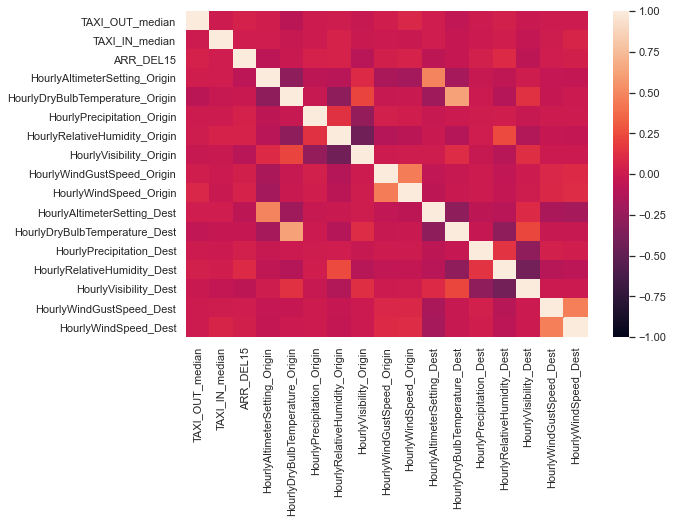

In [77]:
# Heatmap showing global correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=False, cbar=True, cmap=sns.cm.rocket);

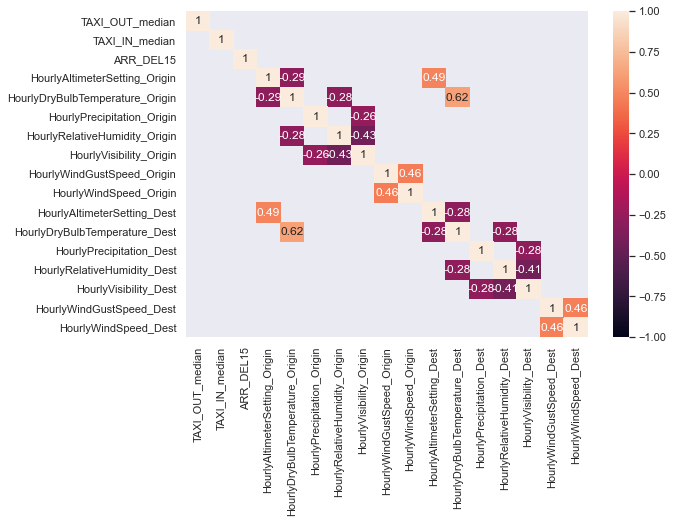

In [78]:
# Heatmap showing remarkable correlations
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=True, cbar=True, cmap=sns.cm.rocket, mask=abs(df_all.corr()) < 0.25);

## 2. Dataset overview

In [79]:
# For deterministic purposes, let's define a seed:
np.random.seed(0)

In [80]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200053 entries, 0 to 7200052
Data columns (total 27 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   MONTH                            string 
 1   DAY_OF_WEEK                      string 
 2   OP_UNIQUE_CARRIER                string 
 3   ORIGIN                           string 
 4   DEST                             string 
 5   DEP_TIME_hour                    string 
 6   TAXI_OUT_median                  int32  
 7   TAXI_IN_median                   int32  
 8   ARR_DEL15                        int32  
 9   ARR_TIME_hour                    string 
 10  DISTANCE_GROUP                   string 
 11  HourlyAltimeterSetting_Origin    float64
 12  HourlyDryBulbTemperature_Origin  float64
 13  HourlyPrecipitation_Origin       float64
 14  HourlyRelativeHumidity_Origin    float64
 15  HourlySkyConditions_Origin       string 
 16  HourlyVisibility_Origin          float64
 17  HourlyWi

In [81]:
# For the initial runs, define a reasonably-sized sample:
sample_length = int(1e5)

# # The dataset is somehow imbalanced (80% on-time / 20% delayed), so let's perform some quick undersampling:
# delayed = df[df['ARR_DEL15'] == 1].sample(sample_length // 2)
# ontime = df[df['ARR_DEL15'] == 0].sample(sample_length // 2)
# df = delayed.append(ontime)

# Although the dataset is somehow imbalanced (80% on-time / 20% delayed), let's try to keep it as is for this test:
df = df_all.sample(sample_length)

# # Get dummies for the categorical features:
# df = pd.get_dummies(df)

print("On-time flights: {:7d} ({:5.2f}%)".format(len(df[df['ARR_DEL15'] == 0]), 100*len(df[df['ARR_DEL15'] == 0])/len(df)))
print("Delayed flights: {:7d} ({:5.2f}%)".format(len(df[df['ARR_DEL15'] == 1]), 100*len(df[df['ARR_DEL15'] == 1])/len(df)))

On-time flights:   81090 (81.09%)
Delayed flights:   18910 (18.91%)


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 3046636 to 4934132
Data columns (total 27 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   MONTH                            100000 non-null  string 
 1   DAY_OF_WEEK                      100000 non-null  string 
 2   OP_UNIQUE_CARRIER                100000 non-null  string 
 3   ORIGIN                           100000 non-null  string 
 4   DEST                             100000 non-null  string 
 5   DEP_TIME_hour                    100000 non-null  string 
 6   TAXI_OUT_median                  100000 non-null  int32  
 7   TAXI_IN_median                   100000 non-null  int32  
 8   ARR_DEL15                        100000 non-null  int32  
 9   ARR_TIME_hour                    100000 non-null  string 
 10  DISTANCE_GROUP                   100000 non-null  string 
 11  HourlyAltimeterSetting_Origin    100000 non-null  float64


### Train / Test split
Break the dataset into three blocks:
1. Training (80%) → cross-validation
2. Test (20%) → final evaluation

In [99]:
# Separate input features from the target:
X = df.drop('ARR_DEL15', axis=1)
y = df['ARR_DEL15']

# Train-test split the data:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80000, 26), (20000, 26), (80000,), (20000,))

In [100]:
def otp_describe(y):
    print("On-time flights: {:7d} ({:5.2f}%)".format(len(y[y == 0]), 100*len(y[y == 0])/len(y)))
    print("Delayed flights: {:7d} ({:5.2f}%)".format(len(y[y == 1]), 100*len(y[y == 1])/len(y)))

In [101]:
print("TRAIN:")
otp_describe(y_train)
print("TEST:")
otp_describe(y_test)

TRAIN:
On-time flights:   64808 (81.01%)
Delayed flights:   15192 (18.99%)
TEST:
On-time flights:   16282 (81.41%)
Delayed flights:    3718 (18.59%)


# Preprocessing

## Target Encoding
- Fit-transform on Training dataset
- Transform on Test dataset

In [102]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [103]:
categorical_features = X_train.select_dtypes(['category', 'string']).columns

df_train = pd.concat([X_train, y_train], axis=1)
for cat_feature in categorical_features:
    df_train[cat_feature] = calc_smooth_mean(df_train, cat_feature, 'ARR_DEL15', 500) # Generally default to 300 
X_train = df_train.drop('ARR_DEL15', axis=1)
X_train

MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER    ORIGIN      DEST  \
4736110  0.187450     0.182938           0.143050  0.157767  0.181283   
1427946  0.239474     0.207295           0.181734  0.172856  0.192632   
6395045  0.143194     0.200092           0.173907  0.192805  0.205352   
3182410  0.173398     0.195550           0.173907  0.150043  0.178292   
7098542  0.197679     0.200092           0.173907  0.169140  0.190058   
...           ...          ...                ...       ...       ...   
4236174  0.187450     0.207295           0.143050  0.174743  0.159386   
5105024  0.187450     0.182938           0.207520  0.248235  0.190561   
1140242  0.187450     0.200092           0.212069  0.248729  0.187874   
6427387  0.173398     0.207295           0.143050  0.157767  0.202747   
465382   0.173398     0.182938           0.181734  0.196667  0.142936   

         DEP_TIME_hour  TAXI_OUT_median  TAXI_IN_median  ARR_TIME_hour  \
4736110       0.255979               15               6       0.247949   
1427946       0.151495               17               6       0.148495   
6395045       0.223670               10               4       0.230252   
3182410       0.141667               10               4       0.173454   
7098542       0.243840               11               4       0.242045   
...                ...              ...             ...            ...   
4236174       0.104782               11               7       0.105599   
5105024       0.264911               20               4       0.242045   
1140242       0.168355               22               9       0.173454   
6427387       0.223670               15               5       0.230252   
465382        0.189869               17               8       0.173454   

         DISTANCE_GROUP  HourlyAltimeterSetting_Origin  \
4736110        0.200850                         30.310   
1427946        0.178491                         29.660   
6395045        0.194537                         30.060   
3182410        0.197922                         30.090   
7098542        0.178491                         30.080   
...                 ...                            ...   
4236174        0.180278                         29.930   
5105024        0.180278                         29.575   
1140242        0.200762                         29.790   
6427387        0.178491                         30.030   
465382         0.180278                         30.250   

         HourlyDryBulbTemperature_Origin  HourlyPrecipitation_Origin  \
4736110                             64.0                         0.0   
1427946                             59.0                         0.0   
6395045                             72.0                         0.0   
3182410                             52.0                         0.0   
7098542                             56.0                         0.0   
...                                  ...                         ...   
4236174                             41.0                         0.0   
5105024                             74.0                         0.0   
1140242                             70.0                         0.0   
6427387                             71.0                         0.0   
465382                              59.0                         0.0   

         HourlyRelativeHumidity_Origin  HourlySkyConditions_Origin  \
4736110                           32.0                    0.226771   
1427946                           83.0                    0.194185   
6395045                           73.0                    0.194185   
3182410                           69.0                    0.197849   
7098542                           84.0                    0.197849   
...                                ...                         ...   
4236174                           82.0                    0.176115   
5105024                           43.0                    0.194185   
1140242                           66.0                

In [104]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 4736110 to 465382
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MONTH                            80000 non-null  float64
 1   DAY_OF_WEEK                      80000 non-null  float64
 2   OP_UNIQUE_CARRIER                80000 non-null  float64
 3   ORIGIN                           80000 non-null  float64
 4   DEST                             80000 non-null  float64
 5   DEP_TIME_hour                    80000 non-null  float64
 6   TAXI_OUT_median                  80000 non-null  int32  
 7   TAXI_IN_median                   80000 non-null  int32  
 8   ARR_TIME_hour                    80000 non-null  float64
 9   DISTANCE_GROUP                   80000 non-null  float64
 10  HourlyAltimeterSetting_Origin    80000 non-null  float64
 11  HourlyDryBulbTemperature_Origin  80000 non-null  float64
 12  HourlyPreci

# QUEDARÍA MAPEAR CADA VALOR DE CADA COLUMNA DEL ENCODING DE TRAINING, AL DE TEST (ES DECIR, HACER EL "TRANSFORM" DE ESE "FIT")
# De momento, hacerlo "mal", con su propio target encoding)

In [105]:
df_test = pd.concat([X_test, y_test], axis=1)
for cat_feature in categorical_features:
    df_test[cat_feature] = calc_smooth_mean(df_test, cat_feature, 'ARR_DEL15', 500) # Generally default to 300 
X_test = df_test.drop('ARR_DEL15', axis=1)
X_test

MONTH  DAY_OF_WEEK  OP_UNIQUE_CARRIER    ORIGIN      DEST  \
4183361  0.208680     0.167849           0.182922  0.187876  0.215217   
1669877  0.199537     0.193253           0.200484  0.204002  0.205326   
6530017  0.175197     0.199350           0.162262  0.177216  0.180114   
137214   0.180215     0.181777           0.168212  0.200712  0.204845   
2035597  0.170009     0.172632           0.162262  0.185300  0.168355   
...           ...          ...                ...       ...       ...   
2360071  0.208680     0.193310           0.162262  0.200712  0.191855   
6982396  0.175197     0.190168           0.142091  0.168750  0.185449   
1291585  0.186225     0.193310           0.207794  0.177417  0.163393   
5210011  0.199537     0.193253           0.197020  0.232394  0.181721   
3531605  0.197775     0.190168           0.182922  0.188066  0.161444   

         DEP_TIME_hour  TAXI_OUT_median  TAXI_IN_median  ARR_TIME_hour  \
4183361       0.149838               14               5       0.123315   
1669877       0.215621               14               8       0.219497   
6530017       0.233451               10               5       0.230997   
137214        0.128523               14              13       0.123315   
2035597       0.239114                9               4       0.243991   
...                ...              ...             ...            ...   
2360071       0.222258               16               4       0.227834   
6982396       0.220717               14               5       0.218691   
1291585       0.108595               14               5       0.123315   
5210011       0.167320               22               5       0.165512   
3531605       0.183795               15               9       0.178605   

         DISTANCE_GROUP  HourlyAltimeterSetting_Origin  \
4183361        0.181775                          30.11   
1669877        0.187748                          29.92   
6530017        0.190716                          30.11   
137214         0.187748                          29.83   
2035597        0.181775                          30.29   
...                 ...                            ...   
2360071        0.187748                          29.93   
6982396        0.179842                          30.22   
1291585        0.190716                          30.06   
5210011        0.181775                          30.25   
3531605        0.181775                          29.95   

         HourlyDryBulbTemperature_Origin  HourlyPrecipitation_Origin  \
4183361                             51.0                         0.0   
1669877                             93.0                         0.0   
6530017                             39.0                         0.0   
137214                              74.0                         0.0   
2035597                             53.0                         0.0   
...                                  ...                         ...   
2360071                             80.0                         0.0   
6982396                             29.0                         0.0   
1291585                             67.0                         0.0   
5210011                             85.0                         0.0   
3531605                             85.0                         0.0   

         HourlyRelativeHumidity_Origin  HourlySkyConditions_Origin  \
4183361                           48.0                    0.154348   
1669877                           56.0                    0.171946   
6530017                           93.0                    0.221699   
137214                            85.0                    0.154348   
2035597                           74.0                    0.190912   
...                                ...                         ...   
2360071                           60.0                    0.171946   
6982396                           85.0                    0.221699   
1291585                           91.0                

## Preprocessing Pipeline

## PCA

### Habría que estudiar más el tema del PCA, pero ahora mismo, con un TargetEncoding, no parece ser muy útil reducir dimensionalidad, ya que el beneficio principalmente suele ser el tiempo, y en este caso no parece que redujéramos muchas dimensiones "poco útiles"

# Baseline model: `LogisticRegression`

### Cross-Fold Target Encoding
- To clamp down on the data leakage, we need to ensure that we’re not using the using the target value from a given sample to compute its target-encoded values
- Let’s create a transformer class to perform the cross-fold target encoding `TargetEncoderCV`
    - we may end up with NaNs (empty values) even when there were categories in the original dataframe
    - we can’t perform cross-fold encoding on our test data, because we don’t have any target values for which to compute the category means! → So, we have to use the category means from the training data in that case.
    ```python
    # Cross-fold Target encode the categorical data
    te = TargetEncoderCV()
    X_target_encoded_cv = te.fit_transform(X_train, y_train)
    X_target_encoded_cv.sample(10)
    
    # Compare category counts
    print('Original:')
    print(X_train.nunique())
    print('\nTarget encoded:')
    print(X_target_encoded_cv.nunique())
    ```
- We can fit the same model as before, but now using cross-fold target encoding:
    ```python
    # Regression model
    model_te_cv = Pipeline([
        ('encoder', TargetEncoderCV()),
        ('scaler', StandardScaler()),
        ('imputer', SimpleImputer(strategy='mean')),
        ('regressor', BayesianRidge())
    ])

    # Cross-validated MAE
    scores = cross_val_score(model_te_cv, X_train, y_train, 
                             cv=3, scoring=mae_scorer)
    print('Cross-validated MAE: %0.3f +/- %0.3f'
          % (scores.mean(), scores.std()))
    ```

In [106]:
# LogisticRegression model
model_te_cv = Pipeline([
#     ('encoder', TargetEncoderCV()),
    ('regressor', LogisticRegression(C=0.1, max_iter=10000))
])

# Cross-validated 'f1'
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_te_cv, X_train, y_train, 
                         cv=3, scoring='average_precision')
print('Cross-validated PR-AUC: %0.3f +/- %0.3f'
      % (scores.mean(), scores.std()))

Cross-validated PR-AUC: 0.330 +/- 0.006


# XGBoost

In [109]:
from xgboost import XGBClassifier

`num_boost_round`: corresponds to the number of boosting rounds or trees to build
- Its optimal value highly depends on the other parameters, and thus it should be re-tuned each time you update a parameter.
- You could do this by tuning it together with all parameters in a grid-search, but it requires a lot of computational effort.
- Fortunately XGBoost provides a nice way to find the best number of rounds whilst training.
- We can test our model at each step and see if adding a new tree/round improves performance.
- If performance haven’t improved for N rounds (N is defined by the variable `early_stopping_round`), we stop the training and keep the best number of boosting rounds.

In [110]:
# Summarize class distribution:
from collections import Counter

counter = Counter(y_train)
total_negative_examples = counter[0]
total_positive_examples = counter[1]

# A sensible default value to set for the scale_pos_weight hyperparameter is the inverse of the class distribution:
scale_pos_weight = total_negative_examples / total_positive_examples

print("TRAINING DATASET")
print("Total dataset:      {:7d} ({:6.2f}%)".format(len(X_train), 100*len(X_train)/len(X_train)))
print("On-time:            {:7d} ( {:5.2f}%)".format(total_negative_examples, 100*total_negative_examples/len(X_train)))
print("Delayed:            {:7d} ( {:5.2f}%)".format(total_positive_examples, 100*total_positive_examples/len(X_train)))
print("'scale_pos_weight' value: {:5.2f}".format(scale_pos_weight))

TRAINING DATASET
Total dataset:        80000 (100.00%)
On-time:              64808 ( 81.01%)
Delayed:              15192 ( 18.99%)
'scale_pos_weight' value:  4.27


[Soruce](https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/)  
Fine-tuning steps:
1. Choose a relatively **high learning rate**. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
    - max_depth = 5 : This should be between 3-10. I’ve started with 5 but you can choose a different number as well. 4-6 can be good starting points.
    - min_child_weight = 1 : A smaller value is chosen because it is a highly imbalanced class problem and leaf nodes can have smaller size groups.
    - gamma = 0 : A smaller value like 0.1-0.2 can also be chosen for starting. This will anyways be tuned later.
    - subsample, colsample_bytree = 0.8 : This is a commonly used used start value. Typical values range between 0.5-0.9.
    - scale_pos_weight = 1: Because of high class imbalance.
2. Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
3. Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
4. Lower the learning rate and decide the optimal parameters .

In [377]:
# Basic model definition:
xgb_model = XGBClassifier(use_label_encoder=False, verbosity=1, random_state=0, objective= 'binary:logistic',
                          booster='gbtree', tree_method='auto', num_boost_round = 10000, early_stopping_round=10,
                          scale_pos_weight=scale_pos_weight)

params = {
            'min_child_weight': [150], # 'min_child_weight': [1, 10, 25, 50, 100, 150, 200],
            'gamma': [0.5], # 'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
            'subsample': [0.9], # 'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.7], # 'colsample_bytree': [0.6, 0.8, 1.0],
            'max_depth': [8], # 'max_depth': [3, 4, 5, 6, 7, 8, 9],
            'learning_rate': np.linspace(0.01, 1, 100), # 'learning_rate': [0.1], # 'learning_rate': [0.05, 0.1, 0.15],
            'n_estimators': [250], # 'n_estimators': [50, 100, 250, 300, 350, 400, 450, 500],
            'reg_alpha': [1e-4], # 'reg_alpha': [1e-6, 1e-5, 1e-4],
            'reg_lambda': [1] # 'reg_lambda': [0.5, 1, 1.5]
        }

# Step 6: Reducing Learning Rate !!!!! Probar

In [378]:
folds = 5
avg_fitting_time = 10
actual_combinations = 5

combinations = 1
for k, v in params.items():
    combinations *= len(v)

fittings = folds * combinations
total_time = fittings * avg_fitting_time
print("Number of parameter combinations:", combinations)
print("Considering a 5-fold cross-validation, total fittings:", fittings)
print("All combination estimated time: {:2.0f}h {:2.0f}min {:2.0f}s".format(total_time//3600,
                                                                           (total_time%3600)//60,
                                                                           (total_time%3600)%60))


actual_total_time = actual_combinations * folds * avg_fitting_time
print("Actual fittings estimated time: {:2.0f}h {:2.0f}min {:2.0f}s".format(actual_total_time//3600,
                                                                           (actual_total_time%3600)//60,
                                                                           (actual_total_time%3600)%60))

Number of parameter combinations: 100
Considering a 5-fold cross-validation, total fittings: 500
All combination estimated time:  1h 23min 20s
Actual fittings estimated time:  0h  4min 10s


## Training

Info: https://stackoverflow.com/questions/51587535/custom-evaluation-function-based-on-f1-for-use-in-xgboost-python-api

In [379]:
# Source: https://github.com/dask/dask-searchcv/issues/51
# Info: https://ml.dask.org/modules/generated/dask_ml.model_selection.RandomizedSearchCV.html

from dask_ml.model_selection import RandomizedSearchCV
from dask.diagnostics import ProgressBar

dask_rscv = RandomizedSearchCV(xgb_model, 
                               cv=5,
                               param_distributions=params, 
                               n_iter=50, # Number of parameter settings that are sampled → trades off runtime vs quality
                               scoring='average_precision', # AP summarizes a precision-recall curve
                               n_jobs=-2, # all CPUs but one are used
                               random_state=0)

with ProgressBar():
    dask_rscv.fit(X=X_train, y=y_train)

[########################################] | 100% Completed |  1hr  1min 59.3s
[########################################] | 100% Completed | 22.3s


In [380]:
cv_res = pd.DataFrame(dask_rscv.cv_results_)
cv_res.sort_values(by='rank_test_score', ascending=True)

params  mean_fit_time  \
26  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.842415   
44  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      45.188402   
49  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      39.622018   
14  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.355999   
22  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      45.304053   
19  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.738336   
2   {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      40.849424   
13  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.766226   
40  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      46.991749   
6   {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.243901   
45  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.500939   
46  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.752866   
36  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.790651   
17  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.192144   
16  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.253638   
35  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      45.184843   
0   {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      41.389343   
15  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.330612   
18  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      43.991922   
48  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.464770   
42  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.864240   
43  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.956675   
47  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.873336   
24  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.664079   
25  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.650161   
20  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.588482   
34  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      45.817132   
10  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.121196   
8   {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      43.448439   
3   {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      42.572488   
37  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      45.007119   
30  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      45.561967   
41  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.433540   
21  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.597336   
38  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      45.190719   
23  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.762585   
33  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.921153   
7   {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.537605   
29  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.779807   
4   {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      42.602692   
12  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.909407   
39  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.436771   
28  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      45.715344   
31  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      45.850174   
32  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      45.691025   
1   {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      39.387645   
11  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.832579   
9   {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      44.052086   
5   {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      42.855283   
27  {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha...      46.549773   

    std_fit_time  mean_score_time  std_score_time  split0_test_score  \
26      0.295219         0.119319        0.008067           0.394048   
44      0.456461         0.115770        0.013485           0.395390   
49      9.275750         0.122411        0.014738           0.393933   
14      0.510990         0.118053        0.017177           0.392257   
22      0.6472

In [381]:
dask_rscv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, early_stopping_round=10,
              gamma=0.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.06999999999999999,
              max_delta_step=0, max_depth=8, min_child_weight=150, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=4,
              num_boost_round=10000, num_parallel_tree=1, random_state=0,
              reg_alpha=0.0001, reg_lambda=1,
              scale_pos_weight=4.265929436545551, subsample=0.9,
              tree_method='auto', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

In [382]:
dask_rscv.best_score_

0.3921207037136457

In [383]:
dask_rscv.best_params_

{'subsample': 0.9,
 'reg_lambda': 1,
 'reg_alpha': 0.0001,
 'n_estimators': 250,
 'min_child_weight': 150,
 'max_depth': 8,
 'learning_rate': 0.06999999999999999,
 'gamma': 0.5,
 'colsample_bytree': 0.7}

In [384]:
dask_rscv.best_index_

26

In [385]:
dask_rscv.scorer_

make_scorer(average_precision_score, needs_threshold=True)

In [386]:
dask_rscv.get_params

<bound method BaseEstimator.get_params of RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster='gbtree',
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_round=10, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constr...
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,

In [387]:
dask_rscv.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [388]:
dask_rscv.predict_proba(X_test)

array([[0.73002064, 0.26997933],
       [0.5221267 , 0.47787336],
       [0.4420197 , 0.5579803 ],
       ...,
       [0.7513071 , 0.24869294],
       [0.62841606, 0.37158397],
       [0.6919875 , 0.30801246]], dtype=float32)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.500252 to fit


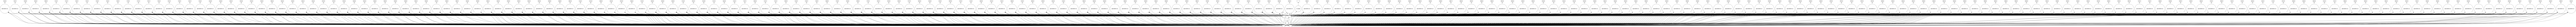

In [389]:
dask_rscv.visualize(filename='dask_rscv_27', format='png')

In [390]:
best_dask_rscv = dask_rscv.best_estimator_
best_dask_rscv

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, early_stopping_round=10,
              gamma=0.5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.06999999999999999,
              max_delta_step=0, max_depth=8, min_child_weight=150, missing=nan,
              monotone_constraints='()', n_estimators=250, n_jobs=4,
              num_boost_round=10000, num_parallel_tree=1, random_state=0,
              reg_alpha=0.0001, reg_lambda=1,
              scale_pos_weight=4.265929436545551, subsample=0.9,
              tree_method='auto', use_label_encoder=False,
              validate_parameters=1, verbosity=1)

## Evaluation

### Additional metrics results

In [391]:
# Evaluate the model's metrics:

from sklearn.metrics import fbeta_score, f1_score, recall_score, precision_score, accuracy_score, \
                            confusion_matrix, classification_report, roc_curve, precision_recall_curve, \
                            roc_auc_score, average_precision_score, plot_roc_curve, plot_precision_recall_curve

def clf_metrics(classifier, X_test, y_test, y_pred):
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print("Normalized confusion matrix:\n", confusion_matrix(y_test, y_pred, normalize='true'), '\n')
    print(classification_report(y_test, y_pred, target_names=['on-time', 'delayed']))
    print("F-beta (ß=2) = {:6.3f}".format(fbeta_score(y_test, y_pred, beta=2)))   
    print("F1 =           {:6.3f}".format(f1_score(y_test, y_pred)))   
    print("Recall =       {:6.3f}".format(recall_score(y_test, y_pred)))   
    print("Precision =    {:6.3f}".format(precision_score(y_test, y_pred)))   
    print("Accuracy =     {:6.3f}".format(accuracy_score(y_test, y_pred)))

### Test

In [392]:
y_train_pred = best_dask_rscv.predict(X_train)
y_test_pred = best_dask_rscv.predict(X_test)
y_test_pred

array([0, 0, 1, ..., 0, 0, 0])

In [393]:
print("-+-+-+ TRAINING dataset +-+-+-\n")
clf_metrics(best_dask_rscv, X_train, y_train, y_train_pred)
print("-------------------------------------------------------\n")
print("-+-+-+ TEST dataset: +-+-+-\n")
clf_metrics(best_dask_rscv, X_test, y_test, y_test_pred)

-+-+-+ TRAINING dataset +-+-+-

Confusion matrix:
 [[47449 17359]
 [ 4128 11064]]
Normalized confusion matrix:
 [[0.73214727 0.26785273]
 [0.27172196 0.72827804]] 

              precision    recall  f1-score   support

     on-time       0.92      0.73      0.82     64808
     delayed       0.39      0.73      0.51     15192

    accuracy                           0.73     80000
   macro avg       0.65      0.73      0.66     80000
weighted avg       0.82      0.73      0.76     80000

F-beta (ß=2) =  0.620
F1 =            0.507
Recall =        0.728
Precision =     0.389
Accuracy =      0.731
-------------------------------------------------------

-+-+-+ TEST dataset: +-+-+-

Confusion matrix:
 [[12580  3702]
 [ 1854  1864]]
Normalized confusion matrix:
 [[0.77263235 0.22736765]
 [0.49865519 0.50134481]] 

              precision    recall  f1-score   support

     on-time       0.87      0.77      0.82     16282
     delayed       0.33      0.50      0.40      3718

    accuracy   

### ROC curve

In [394]:
y_train_probabilities = best_dask_rscv.predict_proba(X_train)[:,1]
y_test_probabilities = best_dask_rscv.predict_proba(X_test)[:,1]
y_test_probabilities[:10]

array([0.26997933, 0.47787336, 0.5579803 , 0.2615549 , 0.3920174 ,
       0.3940672 , 0.37298477, 0.51045734, 0.50140435, 0.7658787 ],
      dtype=float32)

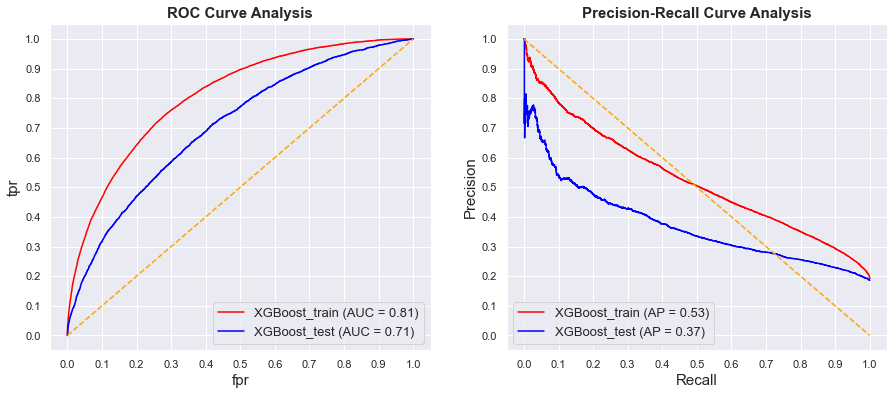

In [395]:
# Plot the figure:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
       
plot_roc_curve(best_dask_rscv, X_train, y_train, color='red', name='XGBoost_train', ax=ax[0])
plot_roc_curve(best_dask_rscv, X_test, y_test, color='blue', name='XGBoost_test', ax=ax[0])
ax[0].plot([0,1], [0,1], color='orange', linestyle='--')

ax[0].set_xticks(np.arange(0.0, 1.1, step=0.1))
ax[0].set_xlabel("fpr", fontsize=15)

ax[0].set_yticks(np.arange(0.0, 1.1, step=0.1))
ax[0].set_ylabel("tpr", fontsize=15)

ax[0].set_title('ROC Curve Analysis', fontweight='bold', fontsize=15)
ax[0].legend(prop={'size':13}, loc='lower right')


plot_precision_recall_curve(best_dask_rscv, X_train, y_train, color='red', name='XGBoost_train', ax=ax[1])
plot_precision_recall_curve(best_dask_rscv, X_test, y_test, color='blue', name='XGBoost_test', ax=ax[1])
ax[1].plot([0,1], [1,0], color='orange', linestyle='--')

ax[1].set_xticks(np.arange(0.0, 1.1, step=0.1))
ax[1].set_xlabel("Recall", fontsize=15)

ax[1].set_yticks(np.arange(0.0, 1.1, step=0.1))
ax[1].set_ylabel("Precision", fontsize=15)

ax[1].set_title('Precision-Recall Curve Analysis', fontweight='bold', fontsize=15)
ax[1].legend(prop={'size':13}, loc='lower left')

## Plotting

### Feature importance (data)

In [396]:
# Let's build a dictionary to better see each INFORMATIVE feature with its corresponding importance:
feature_importance_dict = dict(zip(X_train.columns, best_dask_rscv.feature_importances_))
feature_importance_df = pd.DataFrame(feature_importance_dict.items(), columns=['Feature', 'Importance']) \
                          .sort_values(by='Importance', ascending=False)
feature_importance_df = feature_importance_df[feature_importance_df['Importance'] != 0]
feature_importance_df

Feature  Importance
5                     DEP_TIME_hour    0.091772
8                     ARR_TIME_hour    0.080704
15          HourlyVisibility_Origin    0.063660
20         HourlyPrecipitation_Dest    0.047802
12       HourlyPrecipitation_Origin    0.043854
0                             MONTH    0.042656
3                            ORIGIN    0.042100
21      HourlyRelativeHumidity_Dest    0.041952
13    HourlyRelativeHumidity_Origin    0.041903
2                 OP_UNIQUE_CARRIER    0.039479
4                              DEST    0.037822
23            HourlyVisibility_Dest    0.037150
11  HourlyDryBulbTemperature_Origin    0.033119
17           HourlyWindSpeed_Origin    0.030204
24         HourlyWindGustSpeed_Dest    0.029794
1                       DAY_OF_WEEK    0.029616
10    HourlyAltimeterSetting_Origin    0.027927
14       HourlySkyConditions_Origin    0.027588
16       HourlyWindGustSpeed_Origin    0.027430
18      HourlyAltimeterSetting_Dest    0.027328
25             HourlyWindSpeed_Dest    0.027254
6                   TAXI_OUT_median    0.027215
9                    DISTANCE_GROUP    0.025672
22         HourlySkyConditions_Dest    0.025612
19    HourlyDryBulbTemperature_Dest    0.025326
7                    TAXI_IN_median    0.025059

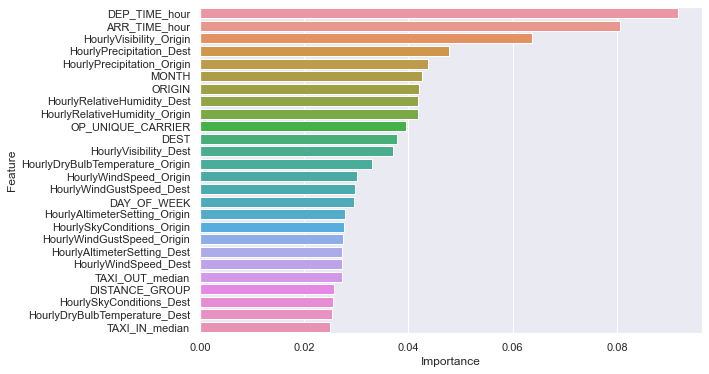

In [397]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.barplot(y='Feature', x='Importance', data=feature_importance_df, orient='h');

### Permutation Feature Importance

In [398]:
# Source: https://machinelearningmastery.com/calculate-feature-importance-with-python/

from sklearn.inspection import permutation_importance

# perform permutation importance
results = permutation_importance(best_dask_rscv, X_train, y_train, scoring='average_precision')
# get importance
importance = dict(zip(X_train.columns, results.importances_mean))
permutation_importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Permutation_Importance']) \
                          .sort_values(by='Permutation_Importance', ascending=False)
permutation_importance_df = permutation_importance_df[permutation_importance_df['Permutation_Importance'] != 0]
permutation_importance_df

Feature  Permutation_Importance
5                     DEP_TIME_hour                0.076107
13    HourlyRelativeHumidity_Origin                0.069720
3                            ORIGIN                0.059629
4                              DEST                0.055801
11  HourlyDryBulbTemperature_Origin                0.049849
0                             MONTH                0.048889
21      HourlyRelativeHumidity_Dest                0.044082
19    HourlyDryBulbTemperature_Dest                0.032023
2                 OP_UNIQUE_CARRIER                0.030749
10    HourlyAltimeterSetting_Origin                0.027819
18      HourlyAltimeterSetting_Dest                0.024393
1                       DAY_OF_WEEK                0.020368
8                     ARR_TIME_hour                0.017664
6                   TAXI_OUT_median                0.017383
25             HourlyWindSpeed_Dest                0.015878
17           HourlyWindSpeed_Origin                0.014980
15          HourlyVisibility_Origin                0.014226
7                    TAXI_IN_median                0.012602
9                    DISTANCE_GROUP                0.008828
14       HourlySkyConditions_Origin                0.008106
23            HourlyVisibility_Dest                0.008053
22         HourlySkyConditions_Dest                0.007341
24         HourlyWindGustSpeed_Dest                0.003422
16       HourlyWindGustSpeed_Origin                0.002218
20         HourlyPrecipitation_Dest                0.001790
12       HourlyPrecipitation_Origin                0.001057

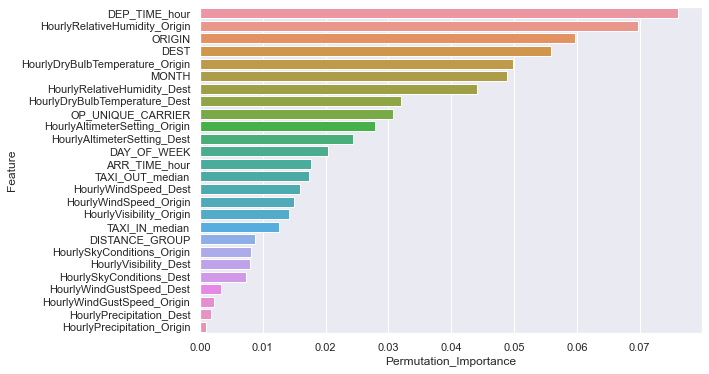

In [399]:
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.barplot(y='Feature', x='Permutation_Importance', data=permutation_importance_df, orient='h');

### Feature importance (plot)

#### Weight-based

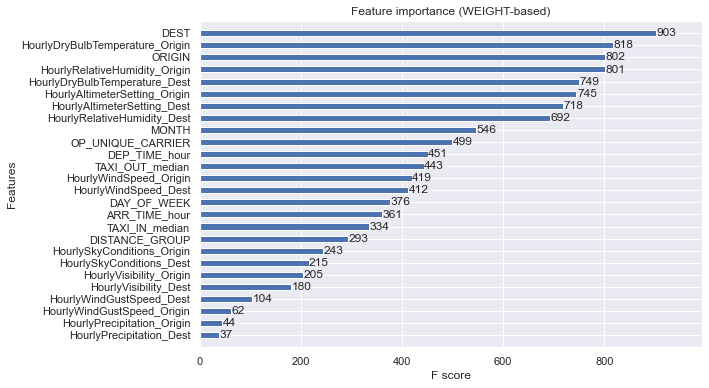

In [400]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(9,6))

plot_importance(booster=best_dask_rscv,
                ax=ax,
                grid=True,
                importance_type='weight', # ”weight” is the number of times a feature appears in a tree
                max_num_features=None, 
                height=0.5,
                xlim=None,
                ylim=None, 
                title='Feature importance (WEIGHT-based)',
                xlabel='F score',
                ylabel='Features',
                show_values=True);

#### Gain-based

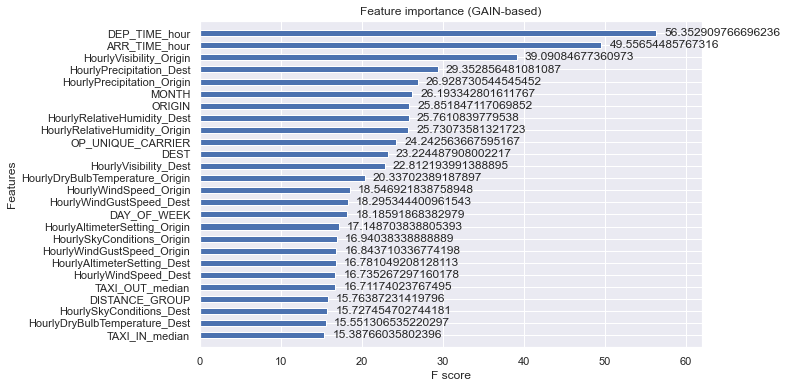

In [401]:
from xgboost import plot_importance

fig,ax = plt.subplots(figsize=(9,6))

plot_importance(booster=best_dask_rscv,
                ax=ax,
                grid=True,
                importance_type='gain',
                max_num_features=None, 
                height=0.5,
                xlim=None,
                ylim=None, 
                title='Feature importance (GAIN-based)',
                xlabel='F score',
                ylabel='Features',
                show_values=True);

### Tree

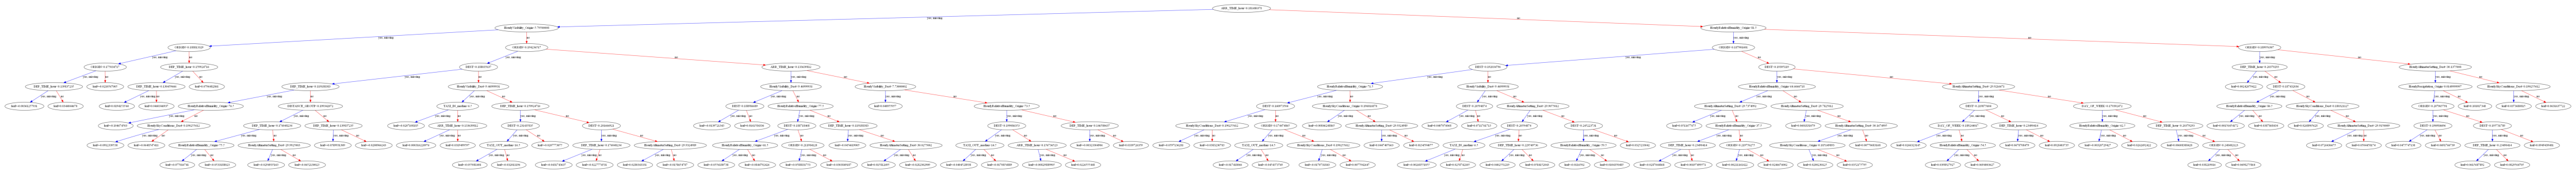

In [402]:
from xgboost import plot_tree

fig,ax = plt.subplots(figsize=(80,50))

plot_tree(booster=best_dask_rscv,
          num_trees=0,
          ax=ax)

plt.savefig('plot_tree_27_best_dask_rscv.png')

### Graphviz (tree)

*Convert specified tree to graphviz instance. IPython can automatically plot the returned graphiz instance. Otherwise, you should call `.render()` method of the returned graphiz instance.*

In [403]:
from xgboost import to_graphviz

tree_graphviz = to_graphviz(booster=best_dask_rscv,
                            yes_color='#0000FF',
                            no_color='#FF0000',
                            condition_node_params={'shape': 'box',
                                                   'style': 'filled,rounded',
                                                   'fillcolor': '#78bceb'},
                            leaf_node_params={'shape': 'box',
                                              'style': 'filled',
                                              'fillcolor': '#e48038'})

format = 'png'
tree_graphviz = to_graphviz(best_dask_rscv)
tree_graphviz.graph_attr = {'dpi':'400'}
tree_graphviz.render('tree_graphviz_27_best_dask_rscv', format = format)

'tree_graphviz_27_best_dask_rscv.png'

___

In [404]:
t1 = time.perf_counter() - t0
print("Time elapsed: {:2.0f}h {:2.0f}min {:2.0f}s".format(t1//3600, (t1%3600)//60, (t1%3600)%60))

Time elapsed: 17h  8min 44s


## Save the model

In [405]:
from joblib import dump, load

# Save model to file:
dump(best_dask_rscv, "XGBoost_27_best_dask_rscv.joblib.dat")
print("Saved model to: XGBoost_27_best_dask_rscv.joblib.dat")

Saved model to: XGBoost_27_best_dask_rscv.joblib.dat


In [406]:
# Load model from file:
loaded_model = load("XGBoost_27_best_dask_rscv.joblib.dat")
print("Loaded model from: XGBoost_27_best_dask_rscv.joblib.dat")

Loaded model from: XGBoost_27_best_dask_rscv.joblib.dat


In [407]:
# Make predictions for test data
predictions = loaded_model.predict(X_test)

# Evaluate predictions:
recall = recall_score(y_test, predictions)
print("Loaded model recall: {:6.3f}".format(recall))

Loaded model recall:  0.501


___

___